In [48]:
import pandas as pd

In [49]:
# risk-free rate
shibor = pd.read_csv("C:\\Users\\10200\\Desktop\\FIN3210\\project\\shibor.csv")
shibor = shibor[shibor['Term'] == '1天']
shibor

,SgnDate,Term,Shibor
0,2016-01-04,1天,1.995
8,2016-01-05,1天,1.998
21,2016-01-06,1天,1.980
28,2016-01-07,1天,1.966
32,2016-01-08,1天,1.958
...,...,...,...
13854,2022-12-26,1天,0.820
13863,2022-12-27,1天,0.632
13872,2022-12-28,1天,0.522
13879,2022-12-29,1天,0.441


In [50]:
df = pd.read_csv("C:\\Users\\10200\\Desktop\\value_factor_cleaned.gz")
df

,S_INFO_WINDCODE,TRADE_DT,S_VAL_PE,S_VAL_PB_NEW,S_VAL_PS,S_DQ_TURN,S_DQ_MV,NET_ASSETS_TODAY
0,000725.SZ,20170101,0.261961,-0.905139,-0.630770,NaN,0.459306,1.695956
1,600760.SH,20170101,0.662752,2.283550,-0.217562,NaN,-0.925563,-0.991142
2,600763.SH,20170101,0.131530,2.283550,1.927661,NaN,-0.834005,-0.971199
3,600795.SH,20170101,-0.842233,-0.954208,-0.837496,NaN,0.315850,0.852581
4,600809.SH,20170101,-0.202278,0.387646,0.078660,NaN,-0.590608,-0.843126
...,...,...,...,...,...,...,...,...
539773,000166.SZ,20220701,-0.802907,-0.877084,-0.426909,-1.017058,-0.035662,0.943279
539774,601998.SH,20220701,-1.034251,-1.035514,-0.821468,-1.224804,0.869676,1.880144
539775,600837.SH,20220701,-0.848232,-0.956443,-0.458201,-0.934757,-0.163523,1.880144
539776,002821.SZ,20220701,1.109421,0.190038,1.976158,0.816402,-0.437179,-0.789256


In [51]:
a = pd.read_csv("C:\\Users\\10200\\Desktop\\eod_price.gz")
a

,S_INFO_WINDCODE,TRADE_DT,S_DQ_PRECLOSE,S_DQ_OPEN,S_DQ_HIGH,S_DQ_LOW,S_DQ_CLOSE,S_DQ_VOLUME,S_DQ_PCTCHANGE,S_DQ_AVGPRICE
0,000001.SZ,20170906,11.64,11.59,11.88,11.48,11.70,791621.55,0.5155,11.6914
1,000002.SZ,20170906,23.76,23.79,24.27,23.50,23.80,361719.63,0.1684,23.9400
2,000063.SZ,20170906,24.36,24.28,24.99,24.19,24.95,708125.33,2.4220,24.7464
3,000066.SZ,20170906,8.81,8.80,8.85,8.71,8.81,240351.11,0.0000,8.7852
4,000069.SZ,20170906,8.75,8.74,8.78,8.68,8.72,216449.20,-0.3429,8.7395
...,...,...,...,...,...,...,...,...,...,...
358817,300529.SZ,20170626,29.67,29.67,29.96,29.35,29.92,6118.41,0.8426,29.7756
358818,300595.SZ,20170626,58.00,58.00,59.22,57.40,59.20,9001.85,2.0690,58.1985
358819,300601.SZ,20170626,25.54,25.55,26.49,25.38,26.36,12540.58,3.2106,26.1417
358820,300628.SZ,20170626,320.70,320.27,322.40,316.29,320.75,9985.35,0.0156,319.3259


In [52]:
a = a[['S_INFO_WINDCODE', 'TRADE_DT', 'S_DQ_OPEN', 'S_DQ_CLOSE']]
a

,S_INFO_WINDCODE,TRADE_DT,S_DQ_OPEN,S_DQ_CLOSE
0,000001.SZ,20170906,11.59,11.70
1,000002.SZ,20170906,23.79,23.80
2,000063.SZ,20170906,24.28,24.95
3,000066.SZ,20170906,8.80,8.81
4,000069.SZ,20170906,8.74,8.72
...,...,...,...,...
358817,300529.SZ,20170626,29.67,29.92
358818,300595.SZ,20170626,58.00,59.20
358819,300601.SZ,20170626,25.55,26.36
358820,300628.SZ,20170626,320.27,320.75


In [53]:
# 按股票代码和交易日期升序排序
a.sort_values(by=["S_INFO_WINDCODE", "TRADE_DT"], inplace=True)
# 计算每个股票的收益率
a["Return"] = a.groupby("S_INFO_WINDCODE")["S_DQ_CLOSE"].pct_change()
a

C:\Users\10200\AppData\Local\Temp\ipykernel_40772\942576268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.sort_values(by=["S_INFO_WINDCODE", "TRADE_DT"], inplace=True)
C:\Users\10200\AppData\Local\Temp\ipykernel_40772\942576268.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a["Return"] = a.groupby("S_INFO_WINDCODE")["S_DQ_CLOSE"].pct_change()


,S_INFO_WINDCODE,TRADE_DT,S_DQ_OPEN,S_DQ_CLOSE,Return
98061,000001.SZ,20170103,9.11,9.16,NaN
189990,000001.SZ,20170104,9.15,9.16,0.000000
216025,000001.SZ,20170105,9.17,9.17,0.001092
254664,000001.SZ,20170106,9.17,9.13,-0.004362
99109,000001.SZ,20170109,9.13,9.15,0.002191
...,...,...,...,...,...
125170,688981.SH,20220627,45.05,45.20,0.003330
182989,688981.SH,20220628,45.21,46.06,0.019027
243008,688981.SH,20220629,46.06,45.16,-0.019540
302389,688981.SH,20220630,45.16,45.17,0.000221


In [54]:
a['TRADE_DT'] = pd.to_datetime(a['TRADE_DT'], format='%Y%m%d')
df['TRADE_DT'] = pd.to_datetime(a['TRADE_DT'], format='%Y%m%d')
shibor['SgnDate'] = pd.to_datetime(a['TRADE_DT'], format='%Y%m%d')

C:\Users\10200\AppData\Local\Temp\ipykernel_40772\3608096042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['TRADE_DT'] = pd.to_datetime(a['TRADE_DT'], format='%Y%m%d')


In [55]:
df = df[['S_INFO_WINDCODE', 'TRADE_DT', 'S_VAL_PB_NEW', 'S_DQ_MV']]

df = df.rename(columns={
    'S_INFO_WINDCODE': 'stk',
    'TRADE_DT': 'date',
    'S_VAL_PB_NEW': 'pb',
    'S_DQ_MV': 'mv'
})

print(df)

              stk       date        pb        mv
0       000725.SZ 2017-09-06 -0.905139  0.459306
1       600760.SH 2017-09-06  2.283550 -0.925563
2       600763.SH 2017-09-06  2.283550 -0.834005
3       600795.SH 2017-09-06 -0.954208  0.315850
4       600809.SH 2017-09-06  0.387646 -0.590608
...           ...        ...       ...       ...
539773  000166.SZ        NaT -0.877084 -0.035662
539774  601998.SH        NaT -1.035514  0.869676
539775  600837.SH        NaT -0.956443 -0.163523
539776  002821.SZ        NaT  0.190038 -0.437179
539777  688981.SH        NaT -0.385660 -0.196625

[539778 rows x 4 columns]


In [56]:
# 将两个数据集按照 "S_INFO_WINDCODE" 和 "TRADE_DT" 合并
df1 = pd.merge(a, df, left_on=["S_INFO_WINDCODE", "TRADE_DT"], right_on=["stk", "date"], how="inner")
# 去除重复的列
df1 = df1.drop(columns=["S_INFO_WINDCODE", "TRADE_DT","S_DQ_OPEN","S_DQ_CLOSE"])
df1

,Return,stk,date,pb,mv
0,0.001092,000001.SZ,2017-01-05,-0.951036,2.113915
1,0.002191,000001.SZ,2017-01-09,-1.011373,2.037872
2,0.000000,000001.SZ,2017-01-10,-0.944230,2.016715
3,-0.001093,000001.SZ,2017-01-11,-1.006034,2.082364
4,0.001094,000001.SZ,2017-01-12,-0.892608,2.159734
...,...,...,...,...,...
350283,-0.008962,688981.SH,2022-04-07,-0.023219,0.003406
350284,-0.008658,688981.SH,2022-04-13,0.066128,0.134230
350285,-0.008658,688981.SH,2022-04-13,-0.079902,-0.054030
350286,-0.002289,688981.SH,2022-04-19,0.005038,0.048510


In [57]:
df2 = pd.merge(df1, shibor, left_on='date', right_on='SgnDate', how='left')
df2 = df2.drop(columns=['SgnDate','Term'])
df2

,Return,stk,date,pb,mv,Shibor
0,0.001092,000001.SZ,2017-01-05,-0.951036,2.113915,NaN
1,0.002191,000001.SZ,2017-01-09,-1.011373,2.037872,NaN
2,0.000000,000001.SZ,2017-01-10,-0.944230,2.016715,NaN
3,-0.001093,000001.SZ,2017-01-11,-1.006034,2.082364,NaN
4,0.001094,000001.SZ,2017-01-12,-0.892608,2.159734,NaN
...,...,...,...,...,...,...
792668,-0.008962,688981.SH,2022-04-07,-0.023219,0.003406,NaN
792669,-0.008658,688981.SH,2022-04-13,0.066128,0.134230,NaN
792670,-0.008658,688981.SH,2022-04-13,-0.079902,-0.054030,NaN
792671,-0.002289,688981.SH,2022-04-19,0.005038,0.048510,NaN


In [58]:
df2.dropna(inplace=True)
df2

,Return,stk,date,pb,mv,Shibor
15,-0.001074,000001.SZ,2017-02-07,-1.104160,2.031091,2.119
16,-0.001074,000001.SZ,2017-02-07,-1.104160,2.031091,2.270
17,-0.001074,000001.SZ,2017-02-07,-1.104160,2.031091,2.092
18,-0.001074,000001.SZ,2017-02-07,-1.104160,2.031091,1.644
19,-0.001074,000001.SZ,2017-02-07,-1.104160,2.031091,2.178
...,...,...,...,...,...,...
792641,-0.036799,688981.SH,2021-02-03,-0.293794,-0.334415,1.405
792642,-0.036799,688981.SH,2021-02-03,-0.293794,-0.334415,1.588
792643,-0.036799,688981.SH,2021-02-03,-0.293794,-0.334415,1.413
792644,-0.036799,688981.SH,2021-02-03,-0.293794,-0.334415,1.432


In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463318 entries, 15 to 792645
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Return  463318 non-null  float64       
 1   stk     463318 non-null  object        
 2   date    463318 non-null  datetime64[ns]
 3   pb      463318 non-null  float64       
 4   mv      463318 non-null  float64       
 5   Shibor  463318 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 24.7+ MB


In [60]:
#     '000651.SZ',  # 格力电器（家电）
#     '600519.SH',  # 贵州茅台（消费品/酒类）
#     '600276.SH',  # 复星医药（医药）
#     '000100.SZ',  # TCL科技
#     '600887.SH',  # 伊利股份（食品/乳制品）
#     '002352.SZ',  # 顺丰控股（物流）
#     '601898.SH', # 中煤能源
#     '000425.SZ', # 徐工机械  
#     '600048.SH', # 保利发展
#     '002466.SZ', # 天齐锂业

In [61]:
desired_stocks = ['000651.SZ', '600519.SH', '600276.SH', '000100.SZ', '600887.SH', '002352.SZ', '601898.SH', '000425.SZ', '600048.SH', '002466.SZ']
ten = df2[df2['stk'].isin(desired_stocks)]
ten

,Return,stk,date,pb,mv,Shibor
16516,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,2.1190
16517,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,2.2700
16518,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,2.0920
16519,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,1.6440
16520,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,2.1780
...,...,...,...,...,...,...
721809,-0.052711,601898.SH,2022-01-25,-1.072185,0.078910,2.7160
721810,-0.052711,601898.SH,2022-01-25,-1.072185,0.078910,2.7460
721811,-0.052711,601898.SH,2022-01-25,-1.072185,0.078910,2.7525
721812,-0.052711,601898.SH,2022-01-25,-1.072185,0.078910,2.7641


In [62]:
ten['stk'].value_counts()

stk
002352.SZ    2132
000651.SZ    2121
600887.SH    2051
600276.SH    2026
601898.SH    2003
000100.SZ    1976
600048.SH    1959
000425.SZ    1928
002466.SZ    1912
600519.SH    1744
Name: count, dtype: int64

In [63]:
# 计算市值排名
ten['MarketCapRank'] = ten.groupby('date')['mv'].rank(ascending=True)

# 计算账面市值比排名
ten['PB_Ratio'] = ten['pb']

# 划分小市值和大市值组合
ten['Size_Group'] = pd.qcut(ten['MarketCapRank'], q=2, labels=['Small', 'Big'])

# 划分高账面市值比和低账面市值比组合
ten['PB_Group'] = pd.qcut(ten['PB_Ratio'], q=2, labels=['Low', 'High'])

# 计算SMB和HML
SMB = ten.groupby(['date', 'Size_Group'])['mv'].mean().unstack()['Small'] - ten.groupby(['date', 'Size_Group'])['mv'].mean().unstack()['Big']
HML = ten.groupby(['date', 'PB_Group'])['pb'].mean().unstack()['High'] - ten.groupby(['date', 'PB_Group'])['pb'].mean().unstack()['Low']

# 输出结果
print("SMB:")
print(SMB)
print("\nHML:")
print(HML)

SMB:
date
2017-02-07         NaN
2017-03-03   -2.030913
2017-04-17         NaN
2017-04-26         NaN
2017-05-08   -1.641005
                ...   
2022-01-07   -1.791398
2022-01-13   -1.585351
2022-01-19   -1.691827
2022-01-25   -1.592413
2022-07-01   -1.632835
Length: 81, dtype: float64

HML:
date
2017-02-07    1.893724
2017-03-03    2.536882
2017-04-17    1.961875
2017-04-26    2.160383
2017-05-08    2.051108
                ...   
2022-01-07    2.313664
2022-01-13    2.495007
2022-01-19    2.313664
2022-01-25    2.495392
2022-07-01    2.319000
Length: 81, dtype: float64


C:\Users\10200\AppData\Local\Temp\ipykernel_40772\4078868367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ten['MarketCapRank'] = ten.groupby('date')['mv'].rank(ascending=True)
C:\Users\10200\AppData\Local\Temp\ipykernel_40772\4078868367.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ten['PB_Ratio'] = ten['pb']
C:\Users\10200\AppData\Local\Temp\ipykernel_40772\4078868367.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [64]:
ten.rename(columns={'Shibor': 'rf'}, inplace=True)
ten.rename(columns={'Return': 'ret'}, inplace=True)
ten

C:\Users\10200\AppData\Local\Temp\ipykernel_40772\4031587943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ten.rename(columns={'Shibor': 'rf'}, inplace=True)
C:\Users\10200\AppData\Local\Temp\ipykernel_40772\4031587943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ten.rename(columns={'Return': 'ret'}, inplace=True)


,ret,stk,date,pb,mv,rf,MarketCapRank,PB_Ratio,Size_Group,PB_Group
16516,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,2.1190,35.5,-0.779900,Small,Low
16517,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,2.2700,35.5,-0.779900,Small,Low
16518,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,2.0920,35.5,-0.779900,Small,Low
16519,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,1.6440,35.5,-0.779900,Small,Low
16520,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,2.1780,35.5,-0.779900,Small,Low
...,...,...,...,...,...,...,...,...,...,...
721809,-0.052711,601898.SH,2022-01-25,-1.072185,0.078910,2.7160,241.0,-1.072185,Big,Low
721810,-0.052711,601898.SH,2022-01-25,-1.072185,0.078910,2.7460,241.0,-1.072185,Big,Low
721811,-0.052711,601898.SH,2022-01-25,-1.072185,0.078910,2.7525,241.0,-1.072185,Big,Low
721812,-0.052711,601898.SH,2022-01-25,-1.072185,0.078910,2.7641,241.0,-1.072185,Big,Low


In [67]:
import pandas as pd
import statsmodels.api as sm

# 假设你已经按照之前的讨论计算了SMB和HML
# SMB和HML应该是具有日期作为索引的Series或DataFrames

dependent_variable = ten['ret']

# 将SMB、HML和常数项合并为一个DataFrame
independent_variables = sm.add_constant(pd.concat([SMB, HML], axis=1))
ten

,ret,stk,date,pb,mv,rf,MarketCapRank,PB_Ratio,Size_Group,PB_Group
16516,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,2.1190,35.5,-0.779900,Small,Low
16517,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,2.2700,35.5,-0.779900,Small,Low
16518,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,2.0920,35.5,-0.779900,Small,Low
16519,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,1.6440,35.5,-0.779900,Small,Low
16520,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,2.1780,35.5,-0.779900,Small,Low
...,...,...,...,...,...,...,...,...,...,...
721809,-0.052711,601898.SH,2022-01-25,-1.072185,0.078910,2.7160,241.0,-1.072185,Big,Low
721810,-0.052711,601898.SH,2022-01-25,-1.072185,0.078910,2.7460,241.0,-1.072185,Big,Low
721811,-0.052711,601898.SH,2022-01-25,-1.072185,0.078910,2.7525,241.0,-1.072185,Big,Low
721812,-0.052711,601898.SH,2022-01-25,-1.072185,0.078910,2.7641,241.0,-1.072185,Big,Low


In [68]:
# 计算市值排名
ten['MarketCapRank'] = ten.groupby('date')['mv'].rank(ascending=True)

# 计算账面市值比排名
ten['PB_Ratio'] = ten['pb']

# 划分小市值和大市值组合
ten['Size_Group'] = pd.qcut(ten['MarketCapRank'], q=2, labels=['Small', 'Big'])

# 划分高账面市值比和低账面市值比组合
ten['PB_Group'] = pd.qcut(ten['PB_Ratio'], q=2, labels=['Low', 'High'])

# 计算SMB和HML
SMB = ten.groupby(['date', 'Size_Group'])['mv'].mean().unstack()['Small'] - ten.groupby(['date', 'Size_Group'])['mv'].mean().unstack()['Big']
HML = ten.groupby(['date', 'PB_Group'])['pb'].mean().unstack()['High'] - ten.groupby(['date', 'PB_Group'])['pb'].mean().unstack()['Low']

# 将计算得到的 SMB 和 HML 添加到 ten 数据框中
ten = pd.merge(ten, SMB.rename('SMB'), left_on='date', right_index=True, how='left')
ten = pd.merge(ten, HML.rename('HML'), left_on='date', right_index=True, how='left')

ten

C:\Users\10200\AppData\Local\Temp\ipykernel_40772\2284074779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ten['MarketCapRank'] = ten.groupby('date')['mv'].rank(ascending=True)
C:\Users\10200\AppData\Local\Temp\ipykernel_40772\2284074779.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ten['PB_Ratio'] = ten['pb']
C:\Users\10200\AppData\Local\Temp\ipykernel_40772\2284074779.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

,ret,stk,date,pb,mv,rf,MarketCapRank,PB_Ratio,Size_Group,PB_Group,SMB,HML
16516,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,2.1190,35.5,-0.779900,Small,Low,NaN,1.893724
16517,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,2.2700,35.5,-0.779900,Small,Low,NaN,1.893724
16518,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,2.0920,35.5,-0.779900,Small,Low,NaN,1.893724
16519,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,1.6440,35.5,-0.779900,Small,Low,NaN,1.893724
16520,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,2.1780,35.5,-0.779900,Small,Low,NaN,1.893724
...,...,...,...,...,...,...,...,...,...,...,...,...
721809,-0.052711,601898.SH,2022-01-25,-1.072185,0.078910,2.7160,241.0,-1.072185,Big,Low,-1.592413,2.495392
721810,-0.052711,601898.SH,2022-01-25,-1.072185,0.078910,2.7460,241.0,-1.072185,Big,Low,-1.592413,2.495392
721811,-0.052711,601898.SH,2022-01-25,-1.072185,0.078910,2.7525,241.0,-1.072185,Big,Low,-1.592413,2.495392
721812,-0.052711,601898.SH,2022-01-25,-1.072185,0.078910,2.7641,241.0,-1.072185,Big,Low,-1.592413,2.495392


In [69]:
# 计算超额收益
ten['ret_rf'] = ten['ret'] - ten['rf']
ten

,ret,stk,date,pb,mv,rf,MarketCapRank,PB_Ratio,Size_Group,PB_Group,SMB,HML,ret_rf
16516,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,2.1190,35.5,-0.779900,Small,Low,NaN,1.893724,-2.127499
16517,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,2.2700,35.5,-0.779900,Small,Low,NaN,1.893724,-2.278499
16518,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,2.0920,35.5,-0.779900,Small,Low,NaN,1.893724,-2.100499
16519,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,1.6440,35.5,-0.779900,Small,Low,NaN,1.893724,-1.652499
16520,-0.008499,000100.SZ,2017-02-07,-0.779900,-0.380266,2.1780,35.5,-0.779900,Small,Low,NaN,1.893724,-2.186499
...,...,...,...,...,...,...,...,...,...,...,...,...,...
721809,-0.052711,601898.SH,2022-01-25,-1.072185,0.078910,2.7160,241.0,-1.072185,Big,Low,-1.592413,2.495392,-2.768711
721810,-0.052711,601898.SH,2022-01-25,-1.072185,0.078910,2.7460,241.0,-1.072185,Big,Low,-1.592413,2.495392,-2.798711
721811,-0.052711,601898.SH,2022-01-25,-1.072185,0.078910,2.7525,241.0,-1.072185,Big,Low,-1.592413,2.495392,-2.805211
721812,-0.052711,601898.SH,2022-01-25,-1.072185,0.078910,2.7641,241.0,-1.072185,Big,Low,-1.592413,2.495392,-2.816811


In [70]:
ten.dropna(inplace=True)
ten

,ret,stk,date,pb,mv,rf,MarketCapRank,PB_Ratio,Size_Group,PB_Group,SMB,HML,ret_rf
16551,-0.002786,000100.SZ,2017-03-03,-0.774647,-0.372721,2.5570,59.0,-0.774647,Small,Low,-2.030913,2.536882,-2.559786
16552,-0.002786,000100.SZ,2017-03-03,-0.774647,-0.372721,2.5570,59.0,-0.774647,Small,Low,-2.030913,2.536882,-2.559786
16553,-0.002786,000100.SZ,2017-03-03,-0.774647,-0.372721,2.5820,59.0,-0.774647,Small,Low,-2.030913,2.536882,-2.584786
16554,-0.002786,000100.SZ,2017-03-03,-0.774647,-0.372721,2.6650,59.0,-0.774647,Small,Low,-2.030913,2.536882,-2.667786
16555,-0.002786,000100.SZ,2017-03-03,-0.774647,-0.372721,2.6790,59.0,-0.774647,Small,Low,-2.030913,2.536882,-2.681786
...,...,...,...,...,...,...,...,...,...,...,...,...,...
721809,-0.052711,601898.SH,2022-01-25,-1.072185,0.078910,2.7160,241.0,-1.072185,Big,Low,-1.592413,2.495392,-2.768711
721810,-0.052711,601898.SH,2022-01-25,-1.072185,0.078910,2.7460,241.0,-1.072185,Big,Low,-1.592413,2.495392,-2.798711
721811,-0.052711,601898.SH,2022-01-25,-1.072185,0.078910,2.7525,241.0,-1.072185,Big,Low,-1.592413,2.495392,-2.805211
721812,-0.052711,601898.SH,2022-01-25,-1.072185,0.078910,2.7641,241.0,-1.072185,Big,Low,-1.592413,2.495392,-2.816811


In [72]:
mkt = pd.read_csv("C:\\Users\\10200\\Desktop\\FIN3210\\project\\rm.csv")
mkt

,date,rm
0,2017/1/3,1.0402
1,2017/1/4,0.7294
2,2017/1/5,0.2095
3,2017/1/6,-0.3503
4,2017/1/9,0.5362
...,...,...
1330,2022/6/27,0.8788
1331,2022/6/28,0.8885
1332,2022/6/29,-1.3989
1333,2022/6/30,1.1036


In [73]:
ten['date'] = pd.to_datetime(ten['date'])
mkt['date'] = pd.to_datetime(mkt['date'])

In [74]:
ten = pd.merge(ten, mkt, on='date')
ten = ten.loc[:,~ten.columns.duplicated()]
ten

,ret,stk,date,pb,mv,rf,MarketCapRank,PB_Ratio,Size_Group,PB_Group,SMB,HML,ret_rf,rm
0,-0.002786,000100.SZ,2017-03-03,-0.774647,-0.372721,2.557,59.0,-0.774647,Small,Low,-2.030913,2.536882,-2.559786,-0.3627
1,-0.002786,000100.SZ,2017-03-03,-0.774647,-0.372721,2.557,59.0,-0.774647,Small,Low,-2.030913,2.536882,-2.559786,-0.3627
2,-0.002786,000100.SZ,2017-03-03,-0.774647,-0.372721,2.582,59.0,-0.774647,Small,Low,-2.030913,2.536882,-2.584786,-0.3627
3,-0.002786,000100.SZ,2017-03-03,-0.774647,-0.372721,2.665,59.0,-0.774647,Small,Low,-2.030913,2.536882,-2.667786,-0.3627
4,-0.002786,000100.SZ,2017-03-03,-0.774647,-0.372721,2.679,59.0,-0.774647,Small,Low,-2.030913,2.536882,-2.681786,-0.3627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17442,-0.036284,601898.SH,2021-08-03,-1.061111,0.093098,2.230,55.5,-1.061111,Small,Low,-1.478761,2.048176,-2.266284,-0.4703
17443,-0.036284,601898.SH,2021-08-03,-1.061111,0.093098,2.209,55.5,-1.061111,Small,Low,-1.478761,2.048176,-2.245284,-0.4703
17444,-0.036284,601898.SH,2021-08-03,-1.061111,0.093098,2.172,55.5,-1.061111,Small,Low,-1.478761,2.048176,-2.208284,-0.4703
17445,-0.036284,601898.SH,2021-08-03,-1.061111,0.093098,2.130,55.5,-1.061111,Small,Low,-1.478761,2.048176,-2.166284,-0.4703


In [76]:
# 把'rm_x'改名为'rm'
ten.rename(columns={'rm_x': 'rm'}, inplace=True)

# 增加一个'rmxrf'列，数据为'rm'列减去'rf'列
ten['rmxrf'] = ten['rm'] - ten['rf']
ten

,ret,stk,date,pb,mv,rf,MarketCapRank,PB_Ratio,Size_Group,PB_Group,SMB,HML,ret_rf,rm,rmxrf
0,-0.002786,000100.SZ,2017-03-03,-0.774647,-0.372721,2.557,59.0,-0.774647,Small,Low,-2.030913,2.536882,-2.559786,-0.3627,-2.9197
1,-0.002786,000100.SZ,2017-03-03,-0.774647,-0.372721,2.557,59.0,-0.774647,Small,Low,-2.030913,2.536882,-2.559786,-0.3627,-2.9197
2,-0.002786,000100.SZ,2017-03-03,-0.774647,-0.372721,2.582,59.0,-0.774647,Small,Low,-2.030913,2.536882,-2.584786,-0.3627,-2.9447
3,-0.002786,000100.SZ,2017-03-03,-0.774647,-0.372721,2.665,59.0,-0.774647,Small,Low,-2.030913,2.536882,-2.667786,-0.3627,-3.0277
4,-0.002786,000100.SZ,2017-03-03,-0.774647,-0.372721,2.679,59.0,-0.774647,Small,Low,-2.030913,2.536882,-2.681786,-0.3627,-3.0417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17442,-0.036284,601898.SH,2021-08-03,-1.061111,0.093098,2.230,55.5,-1.061111,Small,Low,-1.478761,2.048176,-2.266284,-0.4703,-2.7003
17443,-0.036284,601898.SH,2021-08-03,-1.061111,0.093098,2.209,55.5,-1.061111,Small,Low,-1.478761,2.048176,-2.245284,-0.4703,-2.6793
17444,-0.036284,601898.SH,2021-08-03,-1.061111,0.093098,2.172,55.5,-1.061111,Small,Low,-1.478761,2.048176,-2.208284,-0.4703,-2.6423
17445,-0.036284,601898.SH,2021-08-03,-1.061111,0.093098,2.130,55.5,-1.061111,Small,Low,-1.478761,2.048176,-2.166284,-0.4703,-2.6003


In [77]:
ten['stk'].value_counts()

stk
002352.SZ    1918
000651.SZ    1897
600276.SH    1886
000425.SZ    1782
000100.SZ    1743
601898.SH    1730
002466.SZ    1715
600048.SH    1658
600887.SH    1644
600519.SH    1474
Name: count, dtype: int64

In [78]:
ten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17447 entries, 0 to 17446
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ret            17447 non-null  float64       
 1   stk            17447 non-null  object        
 2   date           17447 non-null  datetime64[ns]
 3   pb             17447 non-null  float64       
 4   mv             17447 non-null  float64       
 5   rf             17447 non-null  float64       
 6   MarketCapRank  17447 non-null  float64       
 7   PB_Ratio       17447 non-null  float64       
 8   Size_Group     17447 non-null  category      
 9   PB_Group       17447 non-null  category      
 10  SMB            17447 non-null  float64       
 11  HML            17447 non-null  float64       
 12  ret_rf         17447 non-null  float64       
 13  rm             17447 non-null  float64       
 14  rmxrf          17447 non-null  float64       
dtypes: category(2), dat

In [1]:
import pandas as pd

ten = pd.read_csv('/Users/ryan/Documents/GitHub/CUHKSZ-Course-Projects/FIN 3210/data/Q2_merged.csv')
ten.columns

Index(['stk', 'date', 'ret', 'pb', 'mv', 'rf', 'MarketCapRank', 'PB_Ratio',
       'Size_Group', 'PB_Group', 'SMB', 'HML', 'ret_rf', 'rm', 'rmxrf',
       'Skewness20', 'SharpeRatio20', 'S_VAL_PS', 'NET_ASSETS_TODAY', 'VOL20',
       'WVAD'],
      dtype='object')

In [2]:
import statsmodels.api as sm
X = sm.add_constant(ten[['rmxrf', 'SMB', 'HML']])
y = ten['ret_rf']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 ret_rf   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     65.90
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           5.02e-36
Time:                        10:50:58   Log-Likelihood:                -231.07
No. Observations:                 514   AIC:                             470.1
Df Residuals:                     510   BIC:                             487.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3273      0.257     -5.174      0.0

0.14427953024976192


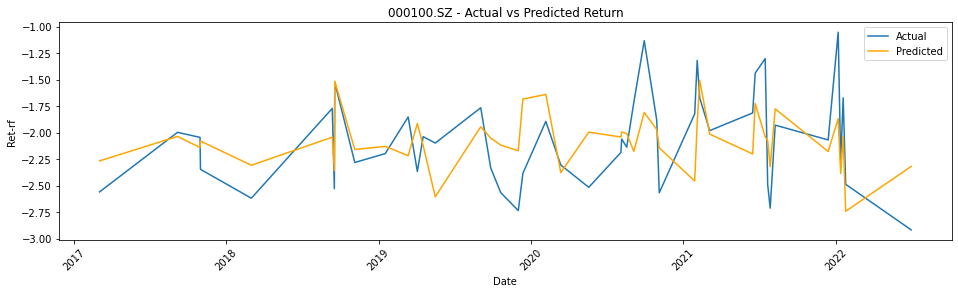

0.15058415155377508


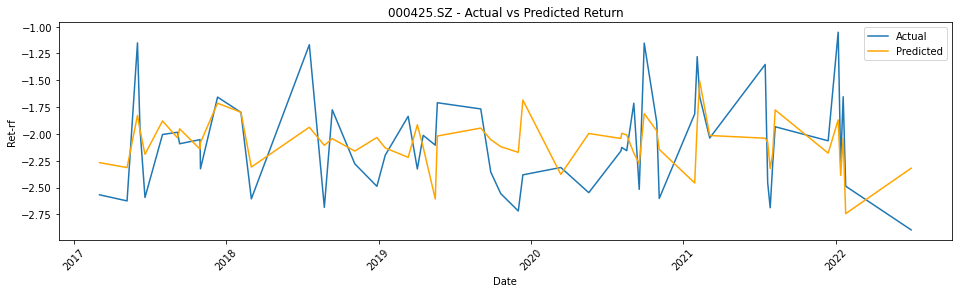

0.14212235244167631


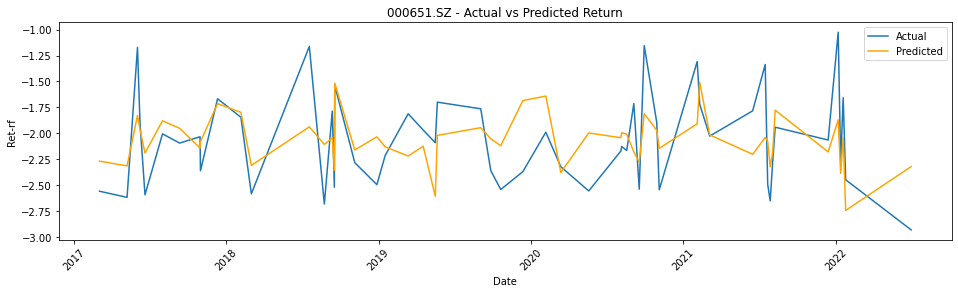

0.13900262414836154


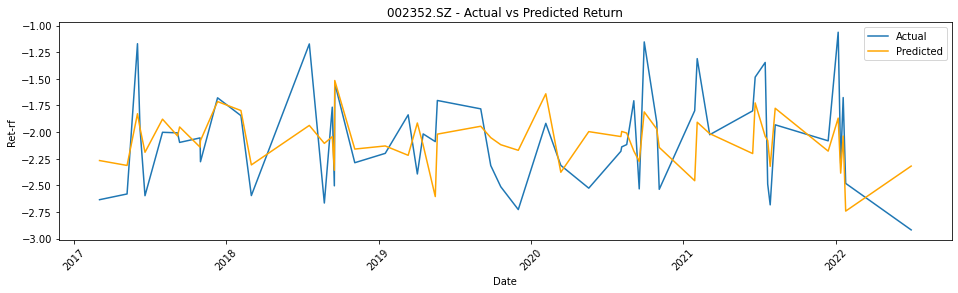

0.1474545333344554


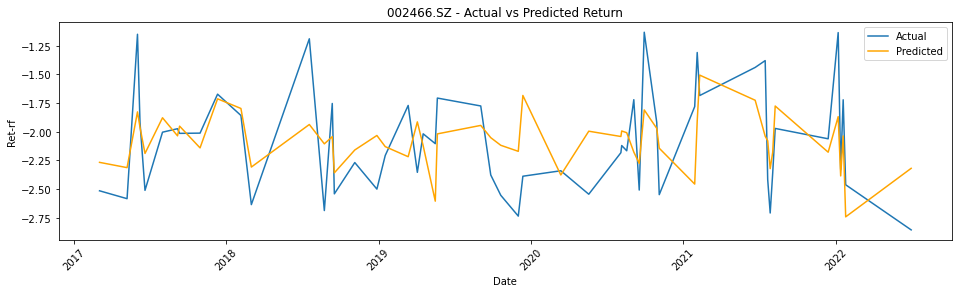

0.15086440560003272


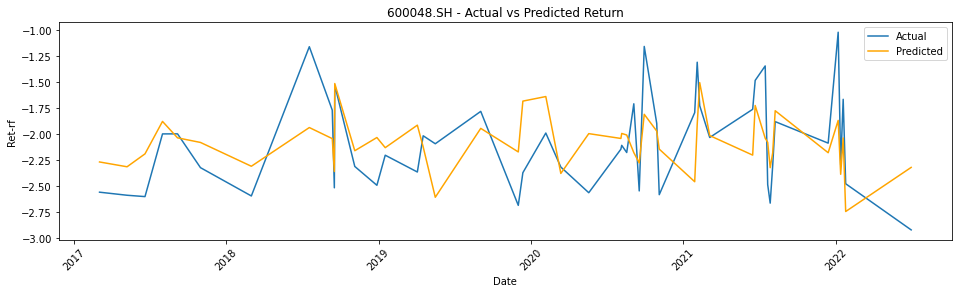

0.15259890063779394


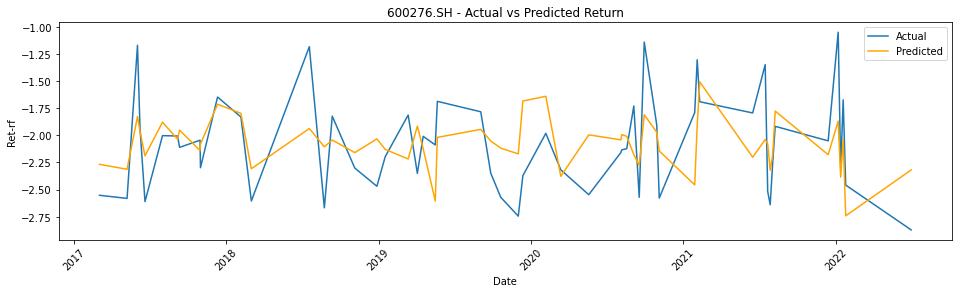

0.1372639130981998


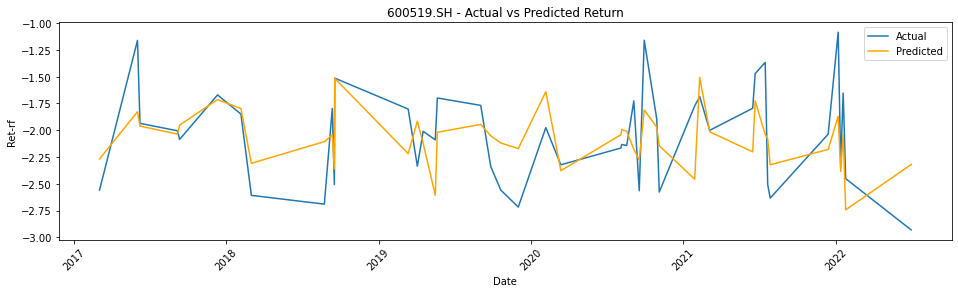

0.13688963172677704


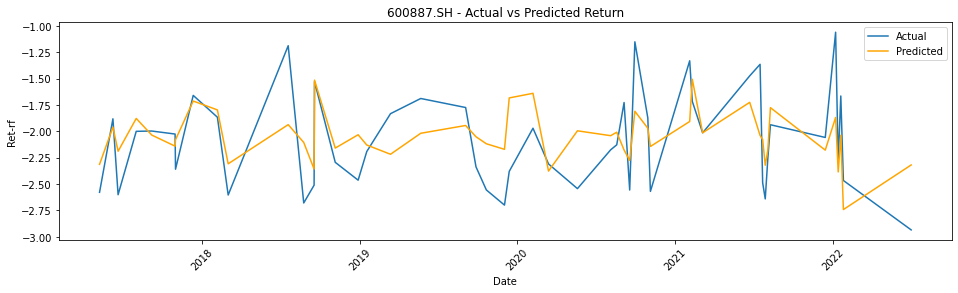

0.13690357295942268


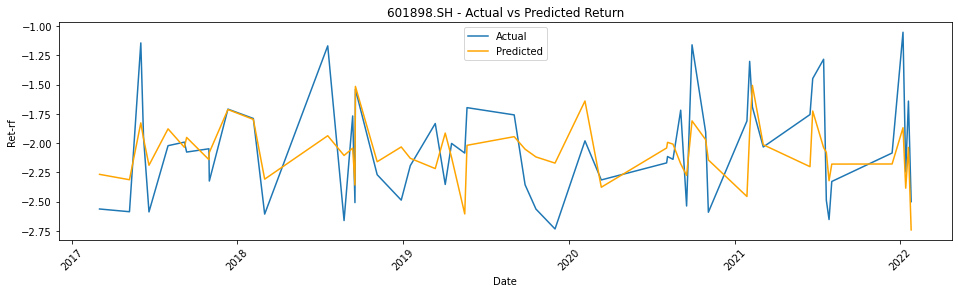

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error

selected_stks = ten['stk'].unique().tolist()
for stock_id in selected_stks:
    stk_data = ten[ten['stk'] == stock_id]

    data_stk = stk_data['date']
    X = sm.add_constant(stk_data[['rmxrf', 'SMB', 'HML']])
    y = stk_data['ret_rf']

    pred_y = model.predict(X)
    mse = mean_squared_error(y, pred_y)
    print(mse)
    # 绘制实际值 vs 预测值的对比图
    data_stk_datetime = pd.to_datetime(data_stk)

    plt.figure(figsize=(16, 4))   
    plt.plot(data_stk_datetime, y, label='Actual')
    plt.plot(data_stk_datetime, pred_y, label='Predicted', color='orange')

    plt.title(f"{stock_id} - Actual vs Predicted Return")
    plt.xlabel('Date')
    plt.ylabel('Ret-rf')
    plt.legend()

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())

    plt.xticks(rotation=45)

    plt.show()

In [80]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions = model.predict(X)

mse = mean_squared_error(y, predictions)
mae = mean_absolute_error(y, predictions)
r2 = r2_score(y, predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²): {r2}')

Mean Squared Error (MSE): 0.1632954694754181
Mean Absolute Error (MAE): 0.3378754461172216
R-squared (R²): 0.39126460986366385


In [81]:
ten['stk'].value_counts()

stk
002352.SZ    1918
000651.SZ    1897
600276.SH    1886
000425.SZ    1782
000100.SZ    1743
601898.SH    1730
002466.SZ    1715
600048.SH    1658
600887.SH    1644
600519.SH    1474
Name: count, dtype: int64

In [ ]:
#     '000651.SZ',  # 格力电器（家电）
#     '600519.SH',  # 贵州茅台（消费品/酒类）
#     '600276.SH',  # 复星医药（医药）
#     '000100.SZ',  # TCL科技
#     '600887.SH',  # 伊利股份（食品/乳制品）
#     '002352.SZ',  # 顺丰控股（物流）
#     '601898.SH', # 中煤能源
#     '000425.SZ', # 徐工机械  
#     '600048.SH', # 保利发展
#     '002466.SZ', # 天齐锂业

In [82]:
ten.to_csv('C:\\Users\\10200\\Desktop\\FIN3210\\project\\ten.csv', index=False)